## Ornstein Uhlenbeck Process



### Mean reversion model

To create a mean-reverting portfolio we *hold* $\alpha = \frac{A}{S_0^{(1)}}$ of a risky asset $S^{(1)}$ and *short* $\beta = \frac{B}{S_0^{(2)}}$, yielding a portfolio value:
$$X_t^{\alpha,\beta} = \alpha S^{(1)} - \beta S^{(2)}, t \geq 0$$
Both assets chosen should be correlated or co-moving. Since in terms of mean-reversion we care only about the ratio between $\alpha$ and $\beta$, without the loss of generality we can set $\alpha= \mathrm{const}$ and A =  1 (that represents the amount of investment), while varying $\beta$ to find the optimal strategy $(\alpha,\beta^*)$


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from arbitragelab.optimal_mean_reversion import *

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False

In [34]:
data1 =  yf.download("GLD GDX", start="2012-03-25", end="2013-12-09")
data2 =  yf.download("GLD GDX", start="2015-12-10", end="2016-02-20")
data3 =  yf.download("GLD GDX", start="2016-02-21", end="2020-08-20")

data1.head()

[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Price       Adj Close                  Close                   High  \
Ticker            GDX         GLD        GDX         GLD        GDX   
Date                                                                  
2012-03-26  45.193291  164.399994  50.630001  164.399994  50.950001   
2012-03-27  44.550598  163.240005  49.910000  163.240005  50.860001   
2012-03-28  43.675835  161.509995  48.930000  161.509995  49.750000   
2012-03-29  43.791882  161.279999  49.060001  161.279999  49.090000   
2012-03-30  44.220337  162.119995  49.540001  162.119995  49.630001   

Price                         Low                   Open              \
Ticker             GLD        GDX         GLD        GDX         GLD   
Date                                                                   
2012-03-26  164.539993  50.200001  162.949997  50.810001  163.169998   
2012-03-27  164.889999  49.799999  163.130005  50.840000  164.520004   
2012-03-28  162.979996  48.630001  160.660004  49.650002  162.710007   
2012-03-29  161.460007  48.049999  159.809998  48.759998  161.139999   
2012-03-30  162.330002  48.810001  161.220001  49.619999  161.669998   

Price         Volume            
Ticker           GDX       GLD  
Date                            
2012-03-26  12638700  13226700  
2012-03-27  10166200  10908700  
2012-03-28  14557900  11008200  
2012-03-29  12259600  11026900  
2012-03-30   9890400   7534000

In [35]:
# You can use the pd.DataFrame of two asset prices
data_train_dataframe = data1["Adj Close"][["GLD", "GDX"]]

# And also we can create training dataset as an array of two asset prices
data_train = np.array(data1["Adj Close"][["GLD", "GDX"]])

# Create an out-of-sample dataset
data_test_and_retrain = data2["Adj Close"][["GLD", "GDX"]]

data_test_the_retrained = np.array(data3["Adj Close"][["GLD", "GDX"]])

data_train.shape

(429, 2)

In [36]:
data_train_dataframe.head()

Ticker,GLD,GDX
Date,,
2012-03-26,164.399994,45.193291
2012-03-27,163.240005,44.550598
2012-03-28,161.509995,43.675835
2012-03-29,161.279999,43.791882
2012-03-30,162.119995,44.220337


In [37]:
example = OrnsteinUhlenbeck()

In [38]:
# You can input the np.array as data 
example.fit(
    data_train, 
    data_frequency="D", 
    discount_rate=[0.05, 0.05],
    transaction_cost=[0.02, 0.02], 
    stop_loss=0.2
)

# The parameters can be allocated in an alternative way
example.fit(
    data_train_dataframe, 
    data_frequency="D", 
    discount_rate=0.05,
    transaction_cost=0.02, 
    stop_loss=0.2
)

In [39]:
# Chosen data type can be pd.DataFrame
example.fit(
    data_train_dataframe, 
    data_frequency="D", 
    discount_rate=[0.05, 0.05],
    transaction_cost=[0.02, 0.02], 
    stop_loss=0.2
)

# In this case we can also specify the interval we want to use for training
example.fit(
    data_train_dataframe, 
    data_frequency="D", 
    discount_rate=[0.05, 0.05],
    start="2012-03-27", 
    end="2013-12-08",
    transaction_cost=[0.02, 0.02], 
    stop_loss=0.2
)

In [40]:
example.check_fit() # statistics

,Theta,Mu,Sigma,Max log-likelihood
empirical,0.567512,9.416683,0.105215,3.616095
simulated,0.557743,13.427893,0.110425,3.592059


### Optimal levels calculation

In [41]:
# To calculate the optimal entry of liquidation levels separately
# you need to use following functions


# Calculate the optimal liquidation level
b = example.optimal_liquidation_level()

# Calculate the optimal entry level
d = example.optimal_entry_level()

# Calculate the optimal liquidation level accounting for stop-loss
b_L = example.optimal_liquidation_level_stop_loss()

# Calculate the optimal entry interval accounting for stop-loss
interval_L = example.optimal_entry_interval_stop_loss()

In [42]:
print("b*=",np.round(b, 4),"\nd*=",np.round(d, 4),"\nb_L*=",np.round(b_L, 4),"\n[a_L*,d_L*]=",np.round(interval_L, 4))

b*= 0.6054 
d*= 0.4997 
b_L*= 0.6054 
[a_L*,d_L*]= [0.2088 0.4997]


### Print results

In [43]:
# Setting the stop-loss level to "None"
# example.L = None

# Call the description function to see all the model's parameters and optimal levels
example.description()

training period                   [2012-03-27, 2013-12-08]
long-term mean                                    0.567512
speed of reversion                                9.416683
volatility                                        0.105215
fitting error                                      0.04304
discount rates                                [0.05, 0.05]
transaction costs                             [0.02, 0.02]
stop-loss level                                        0.2
beta                                                 0.445
optimal entry level                               0.499737
optimal liquidation level                         0.605353
optimal entry interval [sl]              [0.2088, 0.49974]
optimal liquidation level [sl]                    0.605353
dtype: object

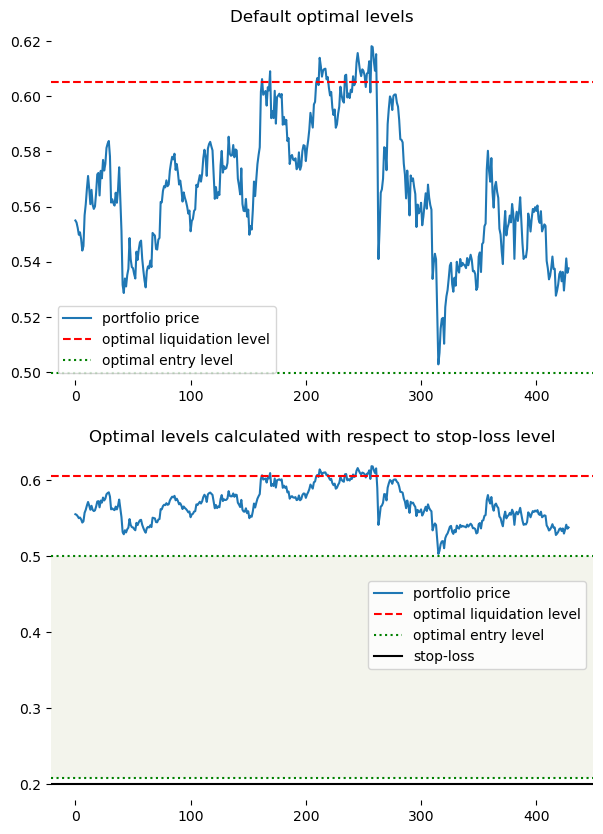

In [44]:
# Showcasing the results on the training data (pd.DataFrame)
fig = example.plot_levels(data=data_train_dataframe, stop_loss=True)
fig.set_figheight(10)
fig.set_figwidth(7)

### Retraining Model

In [45]:
# Retrain the model on the different training interval from already provided data
example.fit_to_assets(start = "2012-05-27", end="2013-05-08")

# Showcase the results of retraining on the different training period of already provided data:
example.L = None
example.description()

training period              [2012-05-27, 2013-05-08]
long-term mean                               0.671916
speed of reversion                          15.372306
volatility                                    0.11212
fitting error                                0.041505
discount rates                           [0.05, 0.05]
transaction costs                        [0.02, 0.02]
stop-loss level                                  None
beta                                         0.384455
optimal entry level                           0.61182
optimal liquidation level                    0.705156
dtype: object

In [46]:
# Retrain the model on new data
example.fit_to_assets(data=data_test_and_retrain)

# Showcase the results of retraining on the new data:
example.L = 0.5
example.description()

training period                   [2015-12-10 00:00:00, 2016-02-19 00:00:00]
long-term mean                                                      0.777116
speed of reversion                                                 10.132597
volatility                                                          0.102366
fitting error                                                      -0.010447
discount rates                                                  [0.05, 0.05]
transaction costs                                               [0.02, 0.02]
stop-loss level                                                          0.5
beta                                                                0.283545
optimal entry level                                                 0.711453
optimal liquidation level                                           0.808444
optimal entry interval [sl]                               [0.50948, 0.71145]
optimal liquidation level [sl]                                      0.808444

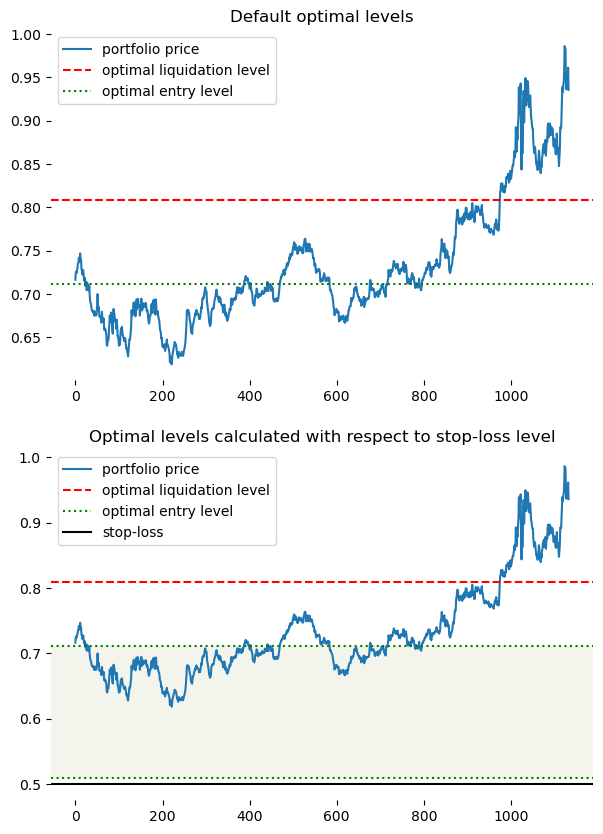

In [47]:
fig = example.plot_levels(data_test_the_retrained, stop_loss=True)
fig.set_figheight(10)
fig.set_figwidth(7)

### Additional functionally

**반감기**

ornstein uhlenbeck process에서 평균으로 회귀하는 속도를 half-life라고 한다

In [48]:
example.half_life()

0.06840765439783553

generating synthetic mean-reversion data

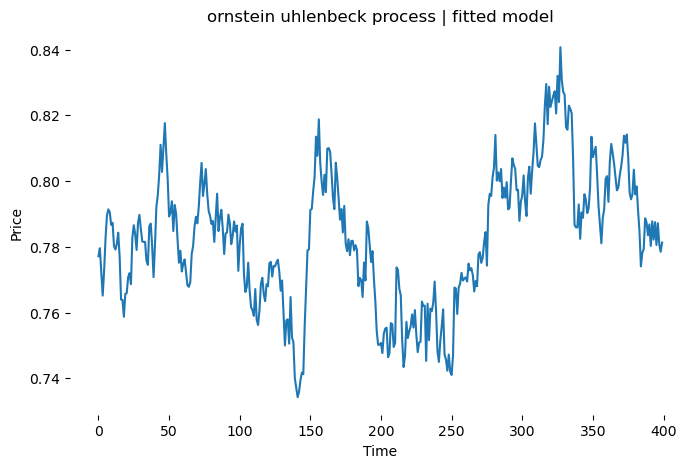

In [55]:
# Syntetic data generated with fitted model parameters
ou_fitted = example.ou_model_simulation(n=400)

plt.figure(figsize = (8, 5))
plt.plot(ou_fitted)
plt.title('ornstein uhlenbeck process | fitted model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

daily data로 가정하는 경우

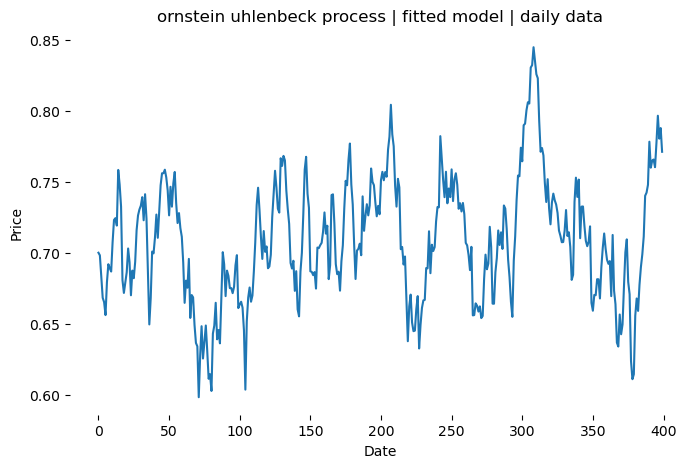

In [56]:
# Presuming we are using daily data
delta_t = 1/252
# Syntetic data generated with given model parameters
ou_given = example.ou_model_simulation(
    n=400, 
    theta_given=0.7, 
    mu_given=21,
    sigma_given=0.3, 
    delta_t_given=delta_t
)
plt.figure(figsize = (8, 5))
plt.plot(ou_given)
plt.title('ornstein uhlenbeck process | fitted model | daily data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

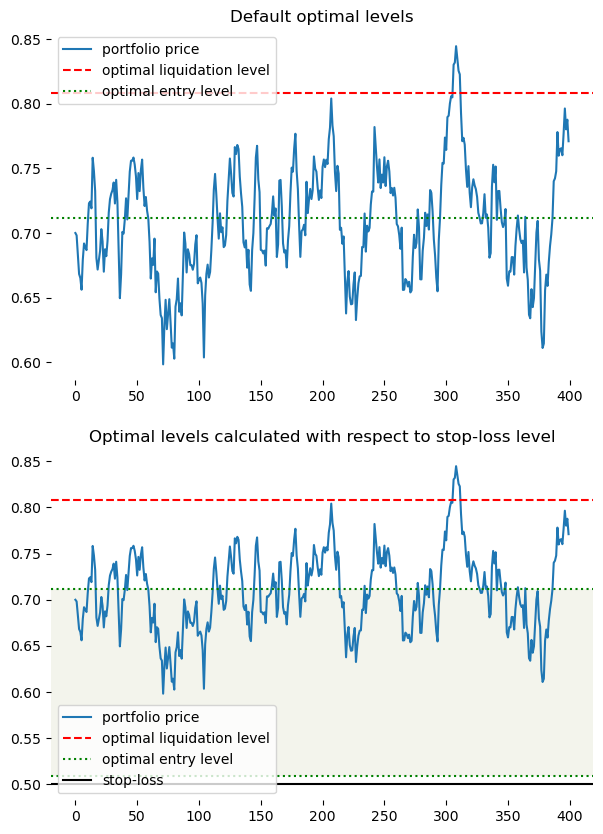

In [57]:
# You can plot the previously found optimal levels on generated data

fig = example.plot_levels(ou_given, stop_loss=True)
fig.set_figheight(10)
fig.set_figwidth(7)

In [58]:
# Creating the dataset
ou_train_given = example.ou_model_simulation(
    n=400, 
    theta_given=0.7, 
    mu_given=12,
    sigma_given=0.1, 
    delta_t_given=delta_t
)

# Training our model on simulated data
example.fit(
    ou_train_given, 
    data_frequency="D", 
    discount_rate=[0.05, 0.05],
    transaction_cost=[0.02, 0.02], 
    stop_loss=0.55
)

# Showcasing the model's details
example.description()

training period                         [None, None]
long-term mean                               0.69704
speed of reversion                         14.524381
volatility                                  0.106074
fitting error                               0.049447
discount rates                          [0.05, 0.05]
transaction costs                       [0.02, 0.02]
stop-loss level                                 0.55
beta                                        0.283545
optimal entry level                         0.638294
optimal liquidation level                   0.728052
optimal entry interval [sl]       [0.56117, 0.63829]
optimal liquidation level [sl]              0.728052
dtype: object

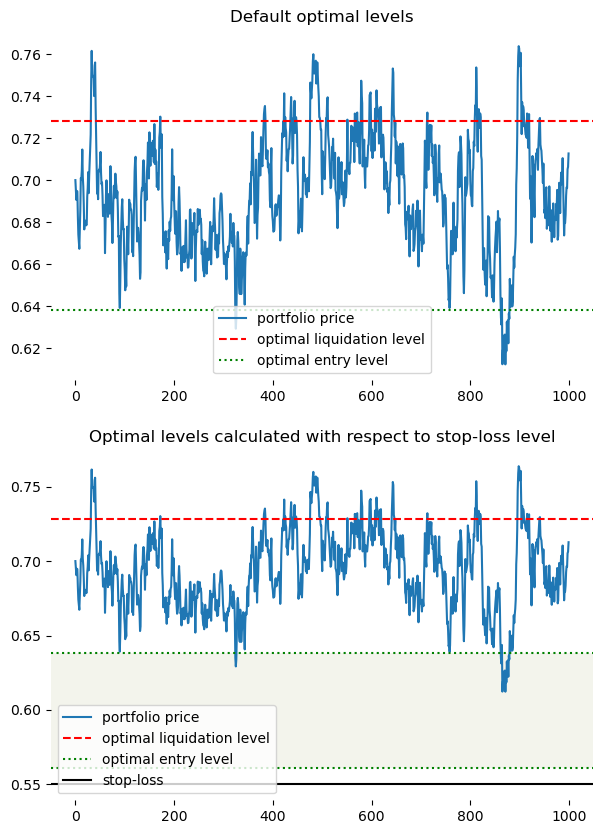

In [59]:
# Creating a testing dataset
ou_test_given = example.ou_model_simulation(
    n=1000, 
    theta_given=0.7, 
    mu_given=12,
    sigma_given=0.15, 
    delta_t_given=delta_t
)

# Plotting found optimal levels on a testing dataset
fig = example.plot_levels(ou_test_given, stop_loss=True)
fig.set_figheight(10)
fig.set_figwidth(7)